In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import pyproj
from mpl_toolkits.mplot3d import Axes3D

In [2]:
path1 = 'data/road/ghana-latest-free.shp/gis_osm_roads_free_1.shp' #This is the road data of Ghana
# for the column 'one way', 'B' represents both way, 'F' represents one way.
path2 = 'data/administrative_boundary/gadm41_GHA_shp' #This is the data of the administrative boundaries of Ghana
path3 = 'data/elevation/n05_w001_1arc_v3.tif' #This is the data of the elevation of Ghana
ghana_road = gpd.read_file(path1)
ghana_admin = gpd.read_file(path2)

image = Image.open(path3)
ele_info = np.array(image)

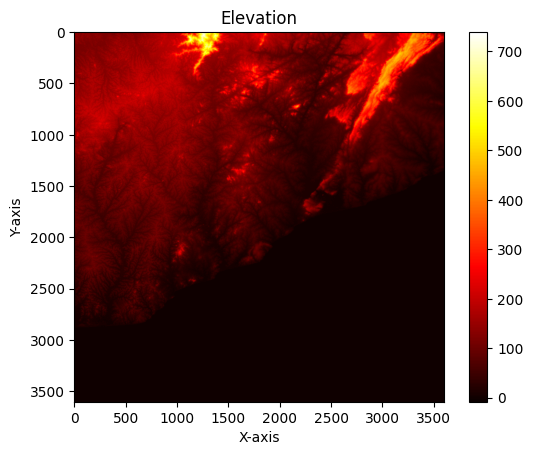

In [3]:
plt.imshow(ele_info, cmap='hot')  # 使用灰度颜色映射，你可以根据需要选择其他颜色映射
plt.colorbar()  # 添加颜色条
plt.title('Elevation')  # 设置标题
plt.xlabel('X-axis')  # 设置X轴标签
plt.ylabel('Y-axis')  # 设置Y轴标签

# 显示图像
plt.show()


In [4]:
ele_info

array([[126, 125, 125, ...,  77,  78,  80],
       [128, 127, 129, ...,  77,  78,  79],
       [131, 133, 134, ...,  77,  78,  79],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int32)

In [5]:
ele_info.shape

(3601, 3601)

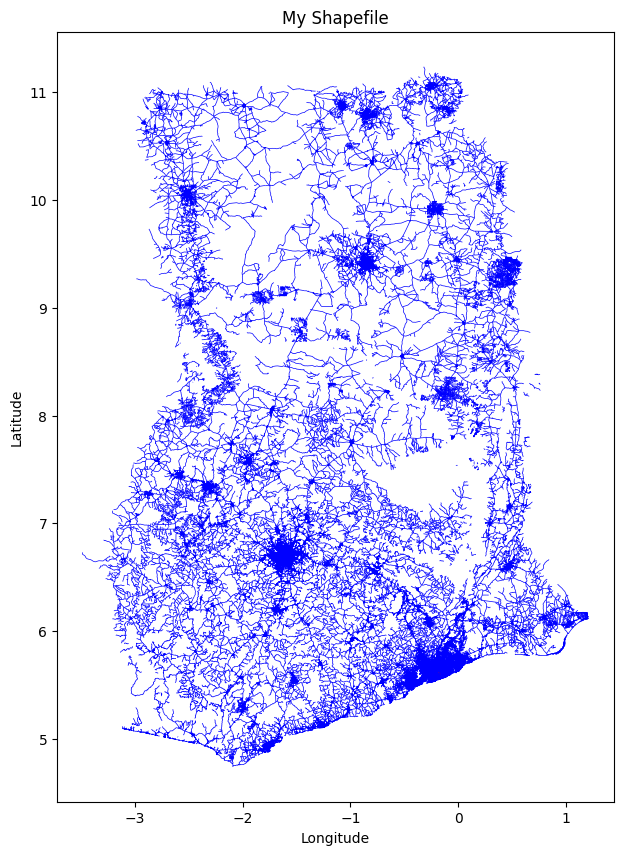

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))

ghana_road.iloc[0:].plot(ax=ax, color='blue', linewidth=0.5)

first_row = ghana_road.iloc[0]

first_geometry = first_row['geometry']
gpd.GeoSeries([first_geometry]).plot(ax=ax, color='red', linewidth=2, label='First Row')

ax.set_title("My Shapefile")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
#ax.legend()

plt.show()

/var/folders/v2/rdzrprkj419fhybqd849y_vm0000gq/T/ipykernel_71710/247885399.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


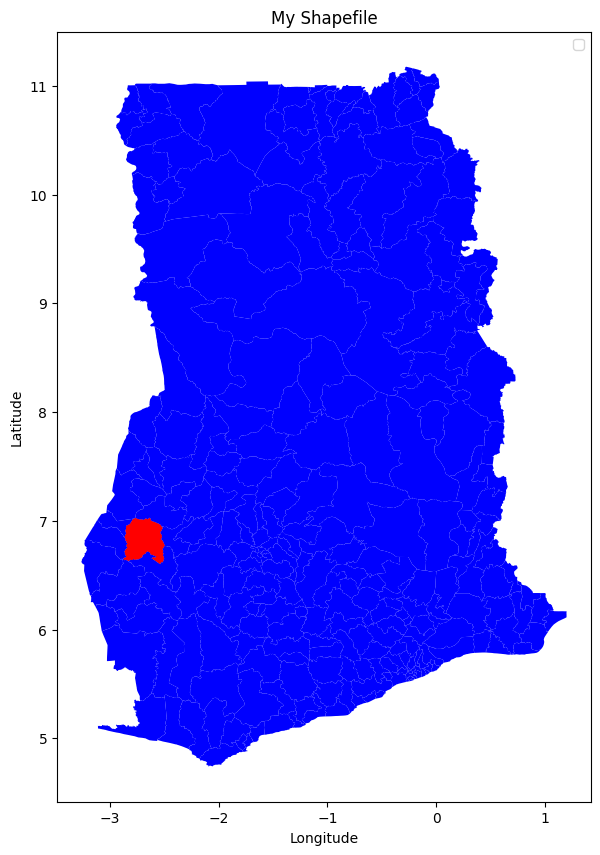

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

ghana_admin.iloc[0:].plot(ax=ax, color='blue', linewidth=0.5)

first_row = ghana_admin.iloc[0]
first_geometry = first_row['geometry']
gpd.GeoSeries([first_geometry]).plot(ax=ax, color='red', linewidth=2, label='First Row')

ax.set_title("My Shapefile")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

plt.show()

In [8]:
ghana_road.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,4790591,5121,unclassified,Airport Road,NaN,B,0,0,F,F,"LINESTRING (-0.17184 5.60847, -0.17182 5.60849..."
1,4790592,5122,residential,Nortei Ababio Road,NaN,B,0,0,F,F,"LINESTRING (-0.18282 5.61197, -0.18336 5.61198..."
2,4790594,5115,tertiary,Airport Road,NaN,F,0,0,F,F,"LINESTRING (-0.17544 5.60550, -0.17418 5.60555..."
3,4790596,5121,unclassified,Airport Road,NaN,F,0,0,F,F,"LINESTRING (-0.17207 5.60853, -0.17207 5.60844..."
4,4790597,5122,residential,Volta Road,NaN,B,0,0,F,F,"LINESTRING (-0.18282 5.61197, -0.18280 5.61262..."


## Check all tags the accra_road.json have

In [9]:
import json

#read the json file from OSM
with open('data/accra_road.json', 'r') as file:
    osm_data = json.load(file)

# get the tags that is important
all_tags = {}
for feature in osm_data['elements']:
    if 'tags' in feature:
        for key, value in feature['tags'].items():
            if key in ['highway', 'oneway', 'maxspeed','junction','access']:
                if key not in all_tags:
                    all_tags[key] = {value:1}
                else:
                    if value not in all_tags[key]:
                        all_tags[key][value] = 1
                    else:
                        all_tags[key][value] += 1
print(all_tags)

{'highway': {'unclassified': 705, 'residential': 10355, 'tertiary': 1038, 'tertiary_link': 14, 'secondary': 661, 'trunk': 301, 'service': 7853, 'primary': 565, 'trunk_link': 165, 'primary_link': 141, 'secondary_link': 79, 'footway': 503, 'raceway': 5, 'path': 373, 'track': 55, 'pedestrian': 30, 'steps': 51, 'motorway_link': 2, 'motorway': 2, 'construction': 4, 'services': 1, 'passing_place': 2, 'corridor': 1, 'living_street': 1}, 'junction': {'roundabout': 242, 'circular': 14, 'yes': 3}, 'oneway': {'yes': 2561, 'no': 131}, 'maxspeed': {'50': 221, '80': 10, '30': 10, '100': 6, '20': 11, '40': 2, '30 mph': 1}, 'access': {'private': 168, 'customers': 20, 'yes': 27, 'school': 1, 'permissive': 20, 'students': 2, 'no': 9, 'delivery': 1}}


/var/folders/v2/rdzrprkj419fhybqd849y_vm0000gq/T/ipykernel_71710/1670695052.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels1, rotation=90)
/var/folders/v2/rdzrprkj419fhybqd849y_vm0000gq/T/ipykernel_71710/1670695052.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels2, rotation=90)


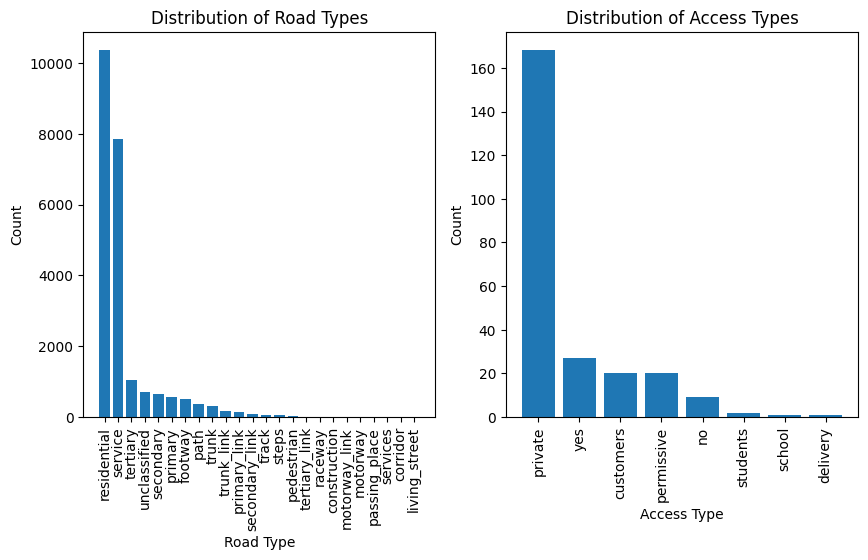

In [10]:
highway = all_tags['highway']
highway = sorted(highway.items(), key=lambda x: x[1], reverse = True)
labels1 = [item[0] for item in highway]
values1 = [item[1] for item in highway]

access = all_tags['access']
access = sorted(access.items(), key=lambda x: x[1], reverse = True)
labels2 = [item[0] for item in access]
values2 = [item[1] for item in access]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[10,5])
ax1.bar(labels1, values1)
ax1.set_title('Distribution of Road Types')
ax1.set_xlabel('Road Type')
ax1.set_ylabel('Count')
ax1.set_xticklabels(labels1, rotation=90)

ax2.bar(labels2, values2)
ax2.set_title('Distribution of Access Types')
ax2.set_xlabel('Access Type')
ax2.set_ylabel('Count')
ax2.set_xticklabels(labels2, rotation=90)


plt.show()

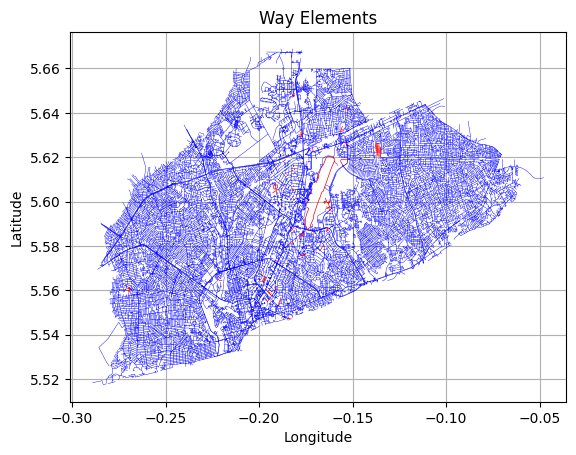

max latitude:  5.6688204
min latitude:  5.517379
max longitude:  -0.0478774
min longitude: -0.2889381


In [11]:
import geopandas as gpd
import json
import matplotlib.pyplot as plt

# 从JSON文件中加载数据
with open('data/accra_road.json') as file:
    data = json.load(file)

# 提取"way"元素的坐标
ways = data['elements']
max_lat = -100
max_lon = -100
min_lat = 100
min_lon = 100

for way in ways:
    if way['type'] == 'way' and 'tags' in way and 'highway' in way['tags'] and way['tags']['highway'] in ['residential','service','unclassified','primary', 'trunk', 'secondary', 'tertiary']:
        node_ids = way['nodes']
        #Get the coordinates of each point in each road segment: (lon, lat)
        coordinates = [(way['geometry'][node_index]['lon'], way['geometry'][node_index]['lat']) for node_index, node_id in enumerate(node_ids)]
        
        #Get the bounding box that contain all road segments, this is for cutting the elevation data to the size of the road network
        min_lat = min(way['bounds']['minlat'], min_lat)
        min_lon = min(way['bounds']['minlon'], min_lon)
        max_lat = max(way['bounds']['maxlat'], max_lat)
        max_lon = max(way['bounds']['maxlon'], max_lon)
        
        x_values, y_values = zip(*coordinates)
        if 'tags' in way and 'access' in way['tags'] and way['tags']['access']=='private':
            plt.plot(x_values, y_values, 'r-', linewidth = 0.5)
        else:
            plt.plot(x_values, y_values, 'b-', linewidth = 0.3)

# 设置图表属性
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Way Elements')
plt.grid(True)
plt.show()

print('max latitude: ', max_lat)
print('min latitude: ', min_lat)
print('max longitude: ', max_lon)
print('min longitude:', min_lon)


In [12]:
print(len(data['elements']))

142611


In [13]:
max_lat_all = -100
max_lon_all = -100
min_lat_all = 100
min_lon_all = 100

for way in ways:
    min_lat_all = min(way['bounds']['minlat'], min_lat_all)
    min_lon_all = min(way['bounds']['minlon'], min_lon_all)
    max_lat_all = max(way['bounds']['maxlat'], max_lat_all)
    max_lon_all = max(way['bounds']['maxlon'], max_lon_all)
print('max latitude: ', max_lat_all)
print('min latitude: ', min_lat_all)
print('max longitude: ', max_lon_all)
print('min longitude:', min_lon_all)


max latitude:  5.6812331
min latitude:  5.5171908
max longitude:  0.0122129
min longitude: -0.3056196


## Cut the elevation data into the size of the road network

2560 3428 1192 1737


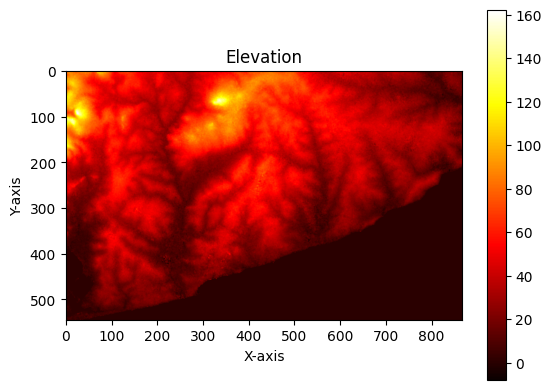

In [14]:
# The boundary lat, lon of the original elevation data
N_bound = 6
S_bound = 5
W_bound = -1
E_bound = 0

pixel_number = len(ele_info)
min_pixel_lat = int(pixel_number - (max_lat - S_bound)/(N_bound - S_bound)*pixel_number)
max_pixel_lat = int(pixel_number - (min_lat - S_bound)/(N_bound - S_bound)*pixel_number)
max_pixel_lon = int((max_lon - W_bound)/(E_bound - W_bound)*pixel_number)
min_pixel_lon = int((min_lon - W_bound)/(E_bound - W_bound)*pixel_number)

print(min_pixel_lon, max_pixel_lon, min_pixel_lat, max_pixel_lat)

ele_info_resize = ele_info[min_pixel_lat:max_pixel_lat,min_pixel_lon:max_pixel_lon]

plt.imshow(ele_info_resize, cmap='hot')  
plt.colorbar()  
plt.title('Elevation')  
plt.xlabel('X-axis')  
plt.ylabel('Y-axis')  

plt.show()

In [15]:
ele_info[2561][3428]

0

## Add elevation data into the street map data

In [16]:
ele_info_resize.min()

-8

In [17]:
degree_per_pixel = 1/pixel_number


## Convert longlat to meters 

In [18]:
utm_converter = pyproj.Proj(proj='utm', zone=30, ellps='WGS84')

In [19]:
eastings1, northings1 = utm_converter(5.2, 1)
eastings2, northings2 = utm_converter(5.1,0.9)
print(f'({eastings1-eastings2}, {northings1-northings2}')

(11213.684593532467, 11193.211748910748


In [20]:
ele_info.shape[0]

3601

In [21]:
#Get the boundary of the elevation data, calculate the length of each pixel
left_bound, up_bound = utm_converter(W_bound, N_bound)
right_bound, down_bound = utm_converter(E_bound, S_bound)
pixel_length_lat = (up_bound - down_bound) / pixel_number
pixel_length_lon = (right_bound - left_bound) / pixel_number

# 从JSON文件中加载数据
with open('data/accra_road.json') as file:
    data = json.load(file)

# 提取"way"元素的坐标
ways = data['elements']

min_i = 10000
max_i = 0
min_j = 10000
max_j = 0

for way in ways:
    if way['type'] == 'way' and 'tags' in way and 'highway' in way['tags'] and way['tags']['highway'] in ['residential','service','unclassified','primary', 'trunk', 'secondary', 'tertiary']:
        node_ids = way['nodes']
        #Get the coordinates of each point in each road segment: (lon, lat)
        coordinates = [(way['geometry'][node_index]['lon'], way['geometry'][node_index]['lat']) for node_index, node_id in enumerate(node_ids)]
        x_values, y_values = zip(*coordinates)
        for node_index, node_id in enumerate(node_ids):
            easting, northing = utm_converter(x_values[node_index], y_values[node_index])
            #find the index of the elevation grid for this point
            i = int((easting - left_bound) // pixel_length_lon)
            j = int((up_bound - northing) // pixel_length_lat)
            
            min_i = min(min_i, i)
            min_j = min(min_j, j)
            max_i = max(max_i, i)
            max_j = max(max_j, j)

            #get the coordinate of the center of the grid
            x_grid = i*pixel_length_lon + pixel_length_lon/2 + left_bound
            y_grid = up_bound - (j*pixel_length_lat + pixel_length_lat/2)

            #Judge which part of the grid does the point exist on
            if easting > x_grid:
                delta_i = 1
            else:
                delta_i = -1
            if northing > y_grid:
                delta_j = -1
            else:
                delta_j = 1

            #calculate the distance of the point with the four grids surounding it.
            distance_A = np.sqrt((easting - ((i+delta_i)*pixel_length_lon + pixel_length_lon/2 + left_bound))**2 + (northing - (up_bound - ((j+delta_j)*pixel_length_lat + pixel_length_lat/2)))**2)
            distance_B = np.sqrt((easting - ((i)*pixel_length_lon + pixel_length_lon/2 + left_bound))**2 + (northing - (up_bound - ((j+delta_j)*pixel_length_lat + pixel_length_lat/2)))**2)
            distance_C = np.sqrt((easting - ((i+delta_i)*pixel_length_lon + pixel_length_lon/2 + left_bound))**2 + (northing - (up_bound - ((j)*pixel_length_lat + pixel_length_lat/2)))**2)
            distance_D = np.sqrt((easting-x_grid)**2 + (northing-y_grid)**2)
            
            weight_total = 1/distance_A + 1/distance_B + 1/distance_C + 1/distance_D
            
            elevation_cur = (
                            1/distance_A/weight_total * ele_info[j+delta_j][i+delta_i] +
                            1/distance_B/weight_total * ele_info[j+delta_j][i] +
                            1/distance_C/weight_total * ele_info[j][i+delta_i] +
                            1/distance_D/weight_total * ele_info[j][i]
                            )
            way['geometry'][node_index]['lon'] = easting
            way['geometry'][node_index]['lat'] = northing
            way['geometry'][node_index]['ele'] = elevation_cur
print(min_i, max_i, min_j, max_j)

2555 3418 1184 1734


In [22]:
max_ele = 0
min_ele = 100000
for way in ways:
    if way['type'] == 'way' and 'tags' in way and 'highway' in way['tags'] and way['tags']['highway'] in ['residential','service','unclassified','primary', 'trunk', 'secondary', 'tertiary']:
        node_ids = way['nodes']
        coordinates = [(way['geometry'][node_index]['lon'], way['geometry'][node_index]['lat'], way['geometry'][node_index]['ele']) for node_index, node_id in enumerate(node_ids)]
        for i in coordinates:
            max_ele = max(max_ele, i[2])
            min_ele = min(min_ele, i[2])
print(max_ele)
print(min_ele)

151.31423648332054
-1.0400309978463385


In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


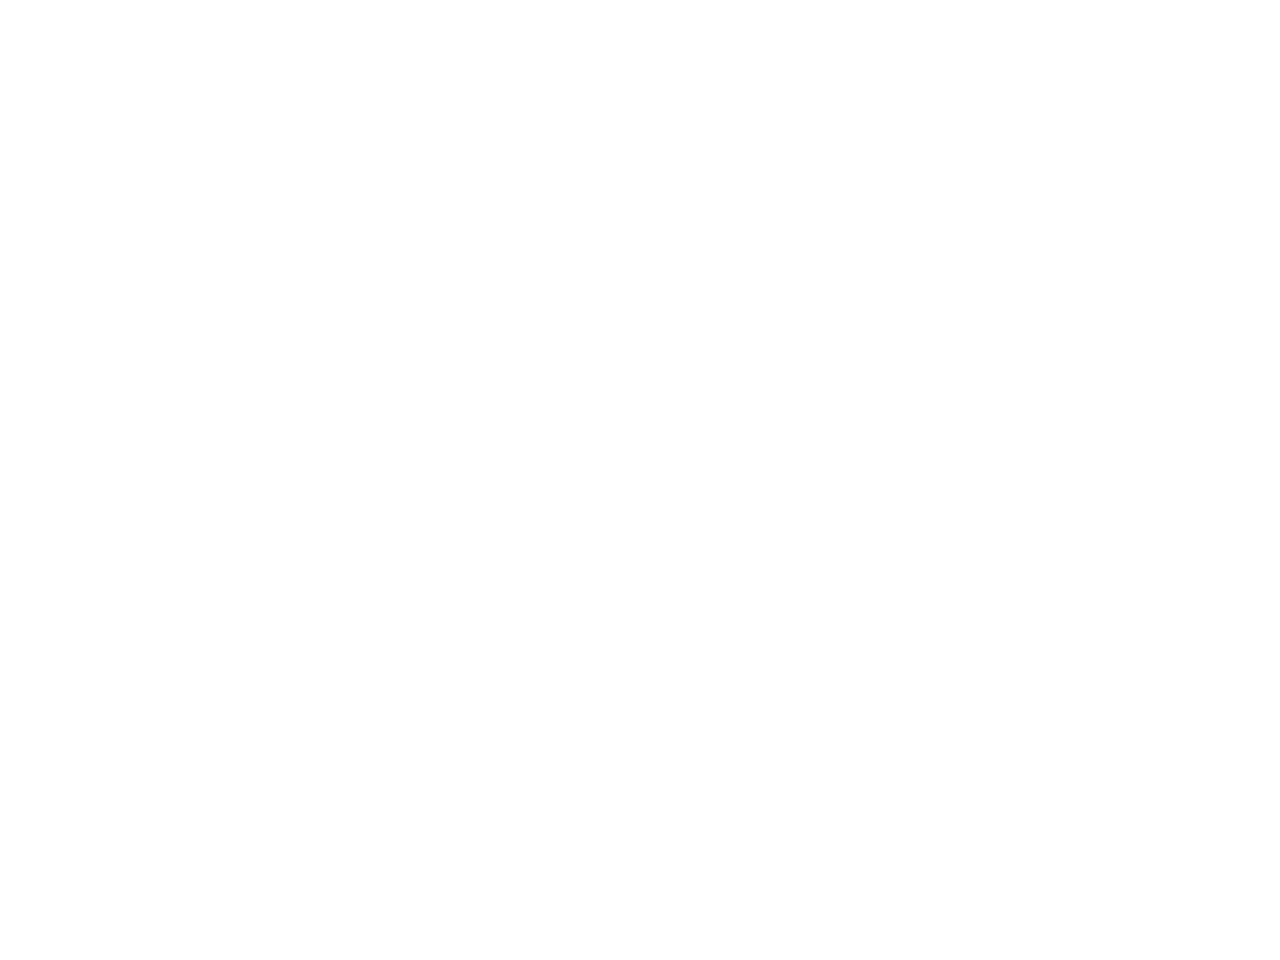

/var/folders/v2/rdzrprkj419fhybqd849y_vm0000gq/T/ipykernel_54884/1836565654.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')  # Choose a colormap (you can use any colormap you prefer)
/var/folders/v2/rdzrprkj419fhybqd849y_vm0000gq/T/ipykernel_54884/1836565654.py:14: RuntimeWarning: invalid value encountered in divide
  normalized_elevation = (z_values - min(z_values)) / (max(z_values) - min(z_values))  # Normalize the elevation values to [0, 1]


In [24]:
import matplotlib.colors as mcolors

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for way in ways:
    if way['type'] == 'way' and 'tags' in way and 'highway' in way['tags'] and way['tags']['highway'] in ['primary']:
        node_ids = way['nodes']
        coordinates = [(way['geometry'][node_index]['lon'], way['geometry'][node_index]['lat'], way['geometry'][node_index]['ele']) for node_index, node_id in enumerate(node_ids)]
        
        x_values, y_values, z_values = zip(*coordinates)
        
        cmap = plt.cm.get_cmap('coolwarm')  # Choose a colormap (you can use any colormap you prefer)
        normalized_elevation = (z_values - min(z_values)) / (max(z_values) - min(z_values))  # Normalize the elevation values to [0, 1]
        colors = [cmap(value) for value in normalized_elevation]

        for i in range(len(x_values) - 1):
            ax.plot([x_values[i], x_values[i+1]], [y_values[i], y_values[i+1]], [z_values[i], z_values[i+1]], color=colors[i], linewidth=0.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation')
ax.set_title('Way Elements (3D)')
ax.view_init(20, 45)


plt.show()

In [18]:
ways[1000]['geometry'][0]

{'lat': 5.5441366, 'lon': -0.2410432}

In [26]:
ways[1000]['geometry'][0]

{'lat': 613524.3283578429, 'lon': 805692.9580435926, 'ele': 29.284969791531932}

In [27]:
formatted_data = json.dumps(ways[2000], indent=4)

# 使用 print() 打印格式化后的 JSON 字符串
print(formatted_data)

{
    "type": "way",
    "id": 39438726,
    "bounds": {
        "minlat": 5.5789848,
        "minlon": -0.2751801,
        "maxlat": 5.5805528,
        "maxlon": -0.2748324
    },
    "nodes": [
        472397152,
        8819774649,
        472397166
    ],
    "geometry": [
        {
            "lat": 617363.4361487438,
            "lon": 801928.5091825989,
            "ele": 20.0
        },
        {
            "lat": 617494.913702527,
            "lon": 801898.6623400901,
            "ele": 20.08878238074222
        },
        {
            "lat": 617536.7791025112,
            "lon": 801889.1548862903,
            "ele": 18.110951806908986
        }
    ],
    "tags": {
        "highway": "residential",
        "source": "Yahoo"
    }
}


In [28]:
print(up_bound)
print(left_bound)
print(down_bound)
print(right_bound)

663608.5753285743
721383.1455096456
553423.9868833314
832713.798738441


In [29]:
import networkx as nx

In [30]:
G = nx.Graph()

In [31]:
ways[1000]['nodes']

[324832884, 5970963758, 4455270370, 5970863293, 5970863295]

In [32]:
for way in ways:
    if way['type'] == 'way' and 'tags' in way and 'highway' in way['tags'] and way['tags']['highway'] in ['residential','service','unclassified','primary', 'trunk', 'secondary', 'tertiary']:
        node_ids = way['nodes']
        #Get the coordinates of each point in each road segment: (lon, lat)
        coordinates = [(way['geometry'][node_index]['lon'], way['geometry'][node_index]['lat'], way['geometry'][node_index]['ele']) for node_index, node_id in enumerate(node_ids)]
        x_values, y_values, z_values = zip(*coordinates)
        for node_index, node_id in enumerate(node_ids):
            if node_index == len(node_ids)-1:
                nx.set_node_attributes(G, {node_id:(x_values[node_index], y_values[node_index], z_values[node_index])}, 'coordinate')
                continue
            else:
                G.add_edges_from([(node_id, node_ids[node_index+1])], distance = np.sqrt((x_values[node_index]-x_values[node_index+1])**2 + (y_values[node_index]-y_values[node_index+1])**2 + (z_values[node_index]-z_values[node_index+1])**2)) 
                nx.set_node_attributes(G, {node_id:(x_values[node_index], y_values[node_index], z_values[node_index])}, 'coordinate')
                              

In [33]:
len(G)

99991

In [34]:
len(G.nodes())

99991

In [35]:
list(G.nodes(data=True))[13]

(4448539604,
 {'coordinate': (813309.3124128869, 620699.4205960558, 48.26936076528696)})

In [36]:
len(G.edges)

108010

In [37]:
G.edges(data=True)

In [ ]:
#pos = nx.spring_layout(G, seed=123)
#plt.figure(figsize = (15,15))
#nx.draw(G, pos=pos)

In [ ]:
nx.has_path(G, source=5970963758, target = 8819774649)

True

In [40]:
nx.shortest_path(G, source=5970963758, target = 8819774649, weight='distance')

[5970963758,
 4455270370,
 5970863293,
 5970863295,
 4455270372,
 5970863296,
 324832878,
 324832877,
 324832876,
 324832875,
 324832882,
 5970863515,
 5970863516,
 324832886,
 5970759044,
 324832880,
 5970759048,
 5971008814,
 5970863343,
 5970863342,
 5970963757,
 5970863341,
 5970863340,
 5970863339,
 5970863338,
 5970863331,
 5970863337,
 5970863336,
 5970863335,
 5970863332,
 9805416445,
 5970863334,
 5970863333,
 5971008577,
 5971008576,
 5971008575,
 5971008574,
 5971008573,
 5971008572,
 5971008571,
 116040335,
 5529208833,
 4455430472,
 5058534300,
 324998140,
 324998168,
 4455457374,
 324998179,
 4457174438,
 5929139435,
 5929139436,
 324998185,
 5929139437,
 324998191,
 4455430470,
 5929139438,
 8859837416,
 5929139439,
 324998198,
 5929139440,
 5929139441,
 324998205,
 5929139442,
 5929139443,
 324998217,
 5929139444,
 5929139445,
 4457174435,
 324998223,
 4457174439,
 4455430473,
 4455430478,
 5929139451,
 324998389,
 7148388007,
 7148388008,
 7148388009,
 7148388010,
 885

In [41]:
nx.shortest_path_length(G, source=5970963758, target = 8819774649, weight='distance') #The algorithm behind this function is Dijkstra


7360.706048148255

In [42]:
def get_closest_point(G,x,y):
    min_distance = float('inf')
    target = None
    for (p,c) in G.nodes(data=True):
        if ((x-c['coordinate'][0])**2 + (y-c['coordinate'][1])**2) < min_distance:
            min_distance = (x-c['coordinate'][0])**2 + (y-c['coordinate'][1])**2
            target = p
    return target

a = get_closest_point(G,813310, 620699)
print(a)

4448539604


In [43]:
kotoka_airport = (813329.05, 620518.36)
uni_ghana = (811795.639, 625324.503)

kotoka_airport = get_closest_point(G, kotoka_airport[0], kotoka_airport[1])
uni_ghana = get_closest_point(G, uni_ghana[0], uni_ghana[1])
print(kotoka_airport)
print(uni_ghana)

path = nx.shortest_path(G, source=kotoka_airport, target=uni_ghana, weight='distance')
path_distance = nx.shortest_path_length(G, source=kotoka_airport, target=uni_ghana, weight='distance')
print('You need to walk through these points.', path, '\n')
print('The total length of your path:', path_distance/1000,'km') #The path length from the google map is 7.3km

4033074333
5729193500
You need to walk through these points. [4033074333, 4033074356, 4448539593, 6013245886, 4033074371, 4033074385, 120356434, 120354609, 6013245888, 120354611, 6012501006, 120354612, 7111377648, 33538608, 6013221982, 5696738477, 33538609, 8874595626, 1984328530, 8874595624, 6011507721, 7115977282, 1984328531, 7116002885, 6011507722, 1984328532, 1984328533, 4448539608, 6011507723, 1984328534, 4448539609, 8874595656, 8874595642, 1984328535, 5696738431, 10185145533, 3480915985, 3078012673, 6011491008, 6011491028, 6011491029, 6011491005, 6011491006, 1984328537, 3078012676, 493762190, 4457112269, 6011477373, 4457112270, 1837599338, 33538924, 33538773, 1362216182, 6015581422, 493756891, 6015581420, 6011526790, 6011518211, 8835908774, 6011518210, 1837599342, 6011697082, 6013393103, 4419677079, 4419677091, 6015581424, 6013003387, 493774553, 6015581426, 5808269823, 493756527, 6015581429, 1837609878, 1424638699, 6080967814, 6010732116, 6013294879, 6010732117, 6013003386, 63014

In [19]:
import networkx as nx

# 创建一个空的有向图对象
G = nx.DiGraph()

# 添加节点到图中
G.add_node('A')
G.add_node('B')
G.add_node('C')

# 添加有向边到图中
G.add_edge('A', 'B')
G.add_edge('B', 'C')

# 打印图的节点和边信息
print("节点：", G.nodes())
print("边：", G.edges())


节点： ['A', 'B', 'C']
边： [('A', 'B'), ('B', 'C')]


In [21]:
nx.has_path(G, 'C','A')

False